In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [70]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

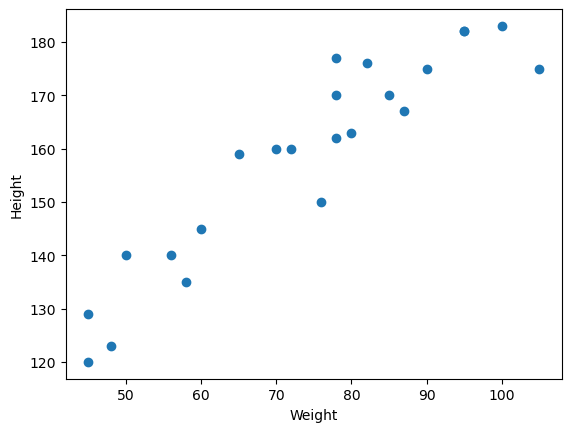

In [71]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [72]:
X=df[['Weight']]
Y=df['Height']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [75]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()

In [78]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

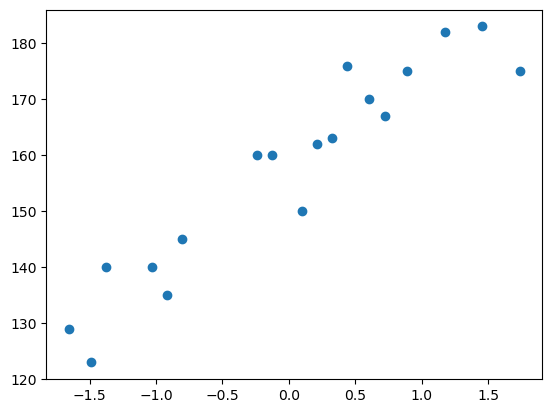

In [79]:
plt.scatter(X_train,Y_train)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
regressor = LinearRegression()

In [82]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [83]:
print(f"The slope or coefficient of weight is {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

The slope or coefficient of weight is [17.03440872]
Intercept: 157.5


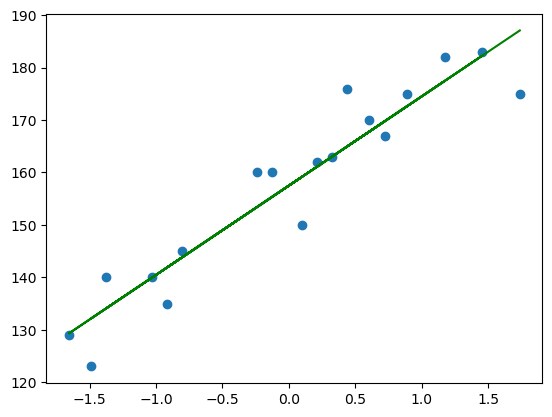

In [84]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'g')

In [85]:
Y_pred_test = regressor.predict(X_test)

In [93]:
Y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [87]:
Y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

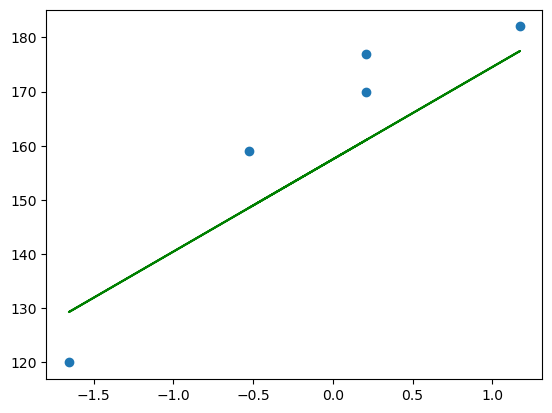

In [94]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test),'g')

# Performance metrics

In [89]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [92]:
mse = mean_squared_error(Y_test,Y_pred_test)
mae = mean_absolute_error(Y_test,Y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


In [95]:
from sklearn.metrics import r2_score

In [96]:
score = r2_score(Y_test,Y_pred_test )

In [97]:
score

0.7769869860423441

In [98]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.7026493147231254

In [99]:
scaled_wt = scaler.transform([[80]])
scaled_wt

C:\Users\pranj\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [103]:
print(f"The predicted height for 80 kg is: {regressor.predict(scaled_wt)}")

The predicted height for 80 kg is: [163.01076266]


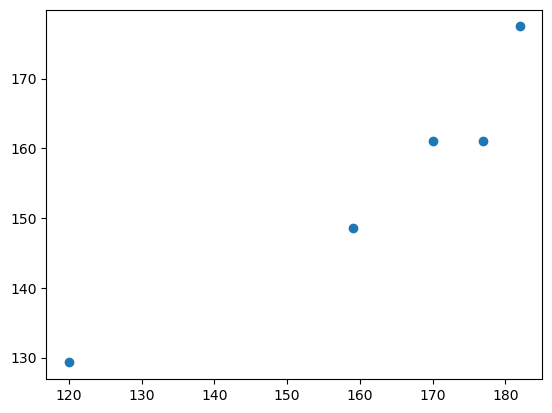

In [104]:
#Assumption 1 - Data points should be linearly distributed
plt.scatter(Y_test,Y_pred_test)

In [105]:
#Assumptions 2 - Plotting this should be normal distribution as done below
residuals=Y_test-Y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\pranj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

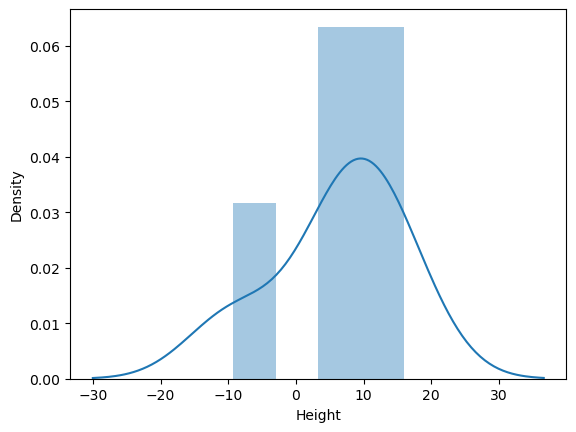

In [107]:
import seaborn as sns
sns.distplot(residuals,kde='True')

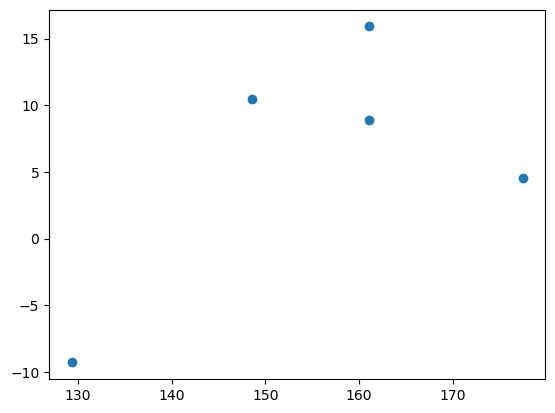

In [108]:
#Assumption 3 - This should be uniform distribution
plt.scatter(Y_pred_test,residuals)